In [ ]:
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import Word

In [ ]:
data = pd.read_csv('hotel_reviews.csv')

In [ ]:
data

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [ ]:
data.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


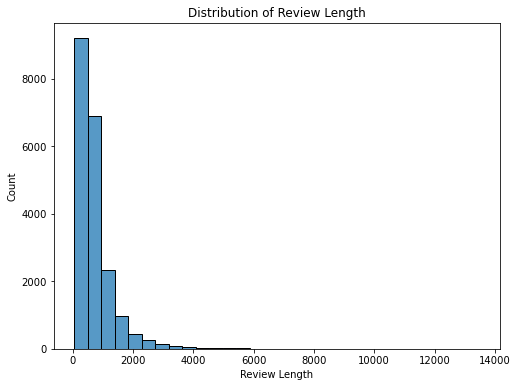

In [ ]:
# Distribution of Reviews Length
data['Review_Length'] = data['Review'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(data['Review_Length'], bins=30)
plt.title('Distribution of Review Length')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()

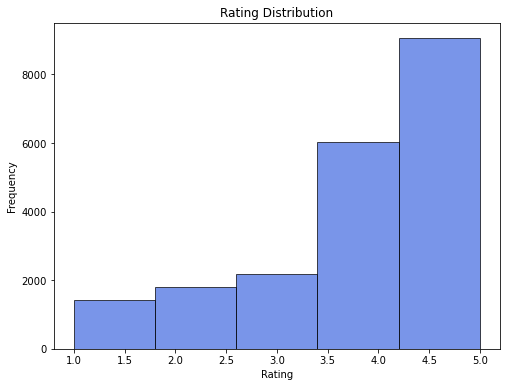

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(data['Rating'], bins=5, edgecolor='black', alpha=0.7, color='royalblue')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Distribution')
plt.show()

# Data type conversion

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [ ]:
data['Review'] = data['Review'].astype(str)

In [ ]:
data['Rating'] = data['Rating'].astype('int')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 240.3+ KB


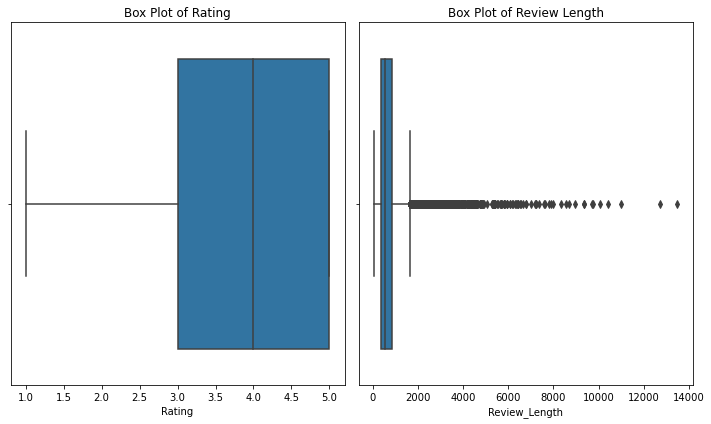

In [ ]:
plt.figure(figsize=(10, 6))

# Box plot for Rating
plt.subplot(1, 2, 1)
sns.boxplot(x=data['Rating'])
plt.title('Box Plot of Rating')

# Box plot for Review Length
plt.subplot(1, 2, 2)
sns.boxplot(x=data['Review_Length'])
plt.title('Box Plot of Review Length')

plt.tight_layout()
plt.show()


# Duplicates

In [ ]:
#Count of duplicated rows
data[data.duplicated()].shape

(0, 2)

# Missing Values

In [ ]:
#Count of missing values
missing_values = data.isnull().sum()
print(missing_values)

Review    0
Rating    0
dtype: int64


In [ ]:
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
data.shape

(20491, 2)

In [ ]:
data.columns

Index(['Review', 'Rating'], dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 240.3+ KB


In [ ]:
data.describe()

,Rating,Review_Length
count,20491.000000,20491.000000
mean,3.952223,670.499927
std,1.233030,630.613204
min,1.000000,36.000000
25%,3.000000,316.000000
50%,4.000000,498.000000
75%,5.000000,799.000000
max,5.000000,12616.000000


# Text Pre processing


In [ ]:

# Initialize NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Text Preprocessing Functions
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenization
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Lemmatization using textblob's Word
    lemmatized_words = [Word(word).lemmatize() for word in words]

    # Join the words back to a single string
    preprocessed_text = ' '.join(lemmatized_words)
    return preprocessed_text


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ashwini.kullolli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashwini.kullolli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data['Preprocessed_Review'] = data['Review'].apply(preprocess_text)

In [ ]:
data.to_csv('preprocessed_dataset.csv', index=False)

In [ ]:
data

,Review,Rating,Preprocessed_Review
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,nice room experience hotel monaco seattle good...
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,best kept secret rd time staying charm star ca...
20487,great location price view hotel great quick pl...,4,great location price view hotel great quick pl...
20488,"ok just looks nice modern outside, desk staff ...",2,ok look nice modern outside desk staff nt part...
20489,hotel theft ruined vacation hotel opened sept ...,1,hotel theft ruined vacation hotel opened sept ...


# Report

In [ ]:
#swwetviz report
import sweetviz as sv

In [ ]:
report = sv.analyze(data)

                                             |                                             | [  0%]   00:00 ->…

In [ ]:
report.show_html('auto_eda_report.html')

Report auto_eda_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
#profile report
pip install --upgrade pandas-profiling --user

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(data)

In [ ]:
profile.to_file("auto_eda_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

  Using cached matplotlib-3.7.2-cp39-cp39-win_amd64.whl (7.5 MB)
Note: you may need to restart the kernel to use updated packages.


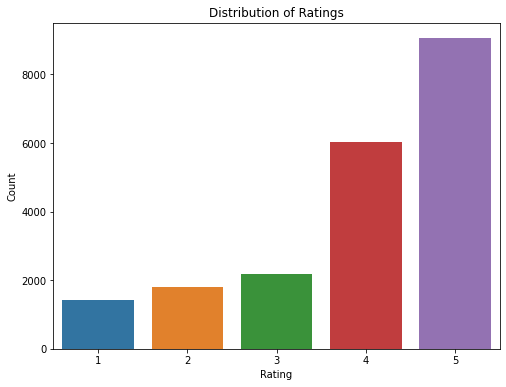

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', data=data)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


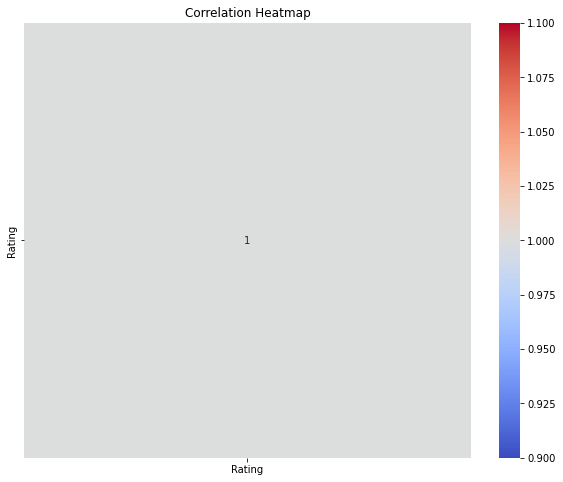

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()